**Taller 4**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FFMpegFileWriter
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML

Punto 1

La función convergió en la iteración 2295


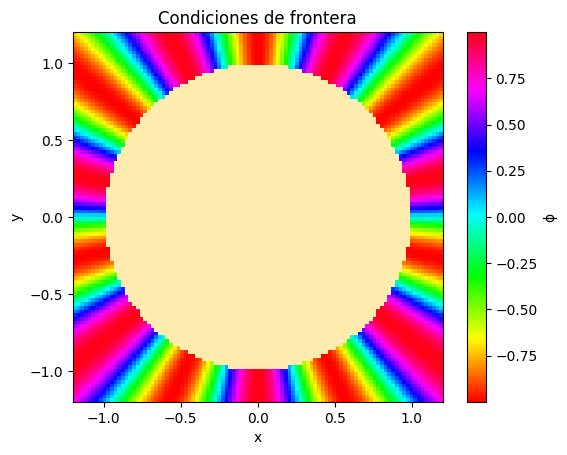

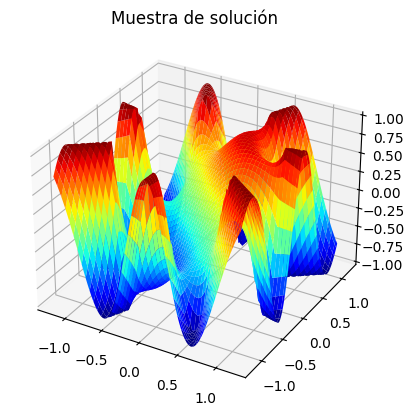

In [3]:
#Hacemos la grilla un poco mas grande quel circulo
r = 1
tamanio = r*1.2
pasos = 100
dpasos = tamanio*2/pasos
x = np.linspace(-tamanio, tamanio, pasos)
y = np.linspace(-tamanio, tamanio, pasos)
X, Y = np.meshgrid(x, y)

theta = np.arctan2(Y, X)
rho = -X - Y

grilla_ceros = np.zeros((pasos, pasos))
radio = np.sqrt(X**2 + Y**2)
circulo = radio < r
#Contamos cuantos puntos hay dentro del circulo del radio especificado
contador = 0
for i in circulo:
    for j in i:
        if j == True:
            contador += 1
grilla_ceros[circulo] = np.random.rand(contador)

grilla_ceros[radio >= r] = np.sin(7*theta[radio >= r])

#Defino la aproximación de diferencias finitas en 2d
def df(phi, i, j):
    return (1/4)*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1]-4*np.pi*(dpasos**2)*rho[i,j])

contador = 0
error = 1
while error > 10e-4 and contador < 15000:
    if contador == 0:
        grilla_nueva = grilla_ceros.copy()
    for i in range(1, pasos-1):
        for j in range(1, pasos-1):
            if radio[i,j] < 1:
                grilla_nueva[i,j] = df(grilla_nueva, i, j)

    error = np.trace(np.abs(grilla_nueva - grilla_ceros))
    grilla_ceros = grilla_nueva.copy()
    contador += 1

print(f"La función convergió en la iteración {contador}")

fig, ax = plt.subplots()
img_base = ax.imshow(grilla_ceros, extent=[-tamanio, tamanio, -tamanio, tamanio], origin="lower", cmap="hsv")
cmap = ListedColormap(["none", "#ffebae"])
ax.imshow(circulo, extent=[-tamanio, tamanio, -tamanio, tamanio], cmap = cmap)
plt.colorbar(img_base, label="ϕ")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Condiciones de frontera")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, grilla_nueva, cmap="jet")
plt.title("Muestra de solución")
plt.show()

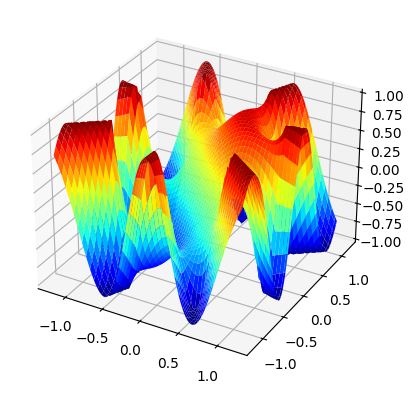

In [14]:
#EXTRA Punto 1
metadata = dict(title="Muestra Solucíon Animada", artist="Yo")
writer = FFMpegFileWriter(fps=60, metadata=metadata)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, grilla_nueva, cmap="jet")
azimo = 300
with writer.saving(fig, "Muestra de solución.mp4", 200):
    for i in range(360*2):
        ax.view_init(elev=30, azim=azimo, roll=0)
        azimo += 0.50

        writer.grab_frame()

**AVISO**
Debido a problemas de compatibilidad, La animación se subio al repositorio como un archivo separado. Por favor dirigirse al archivo "Muestra de Solución.mp4" para ver la animación correspondiente a este punto.

Punto 2

C es igual 0.25


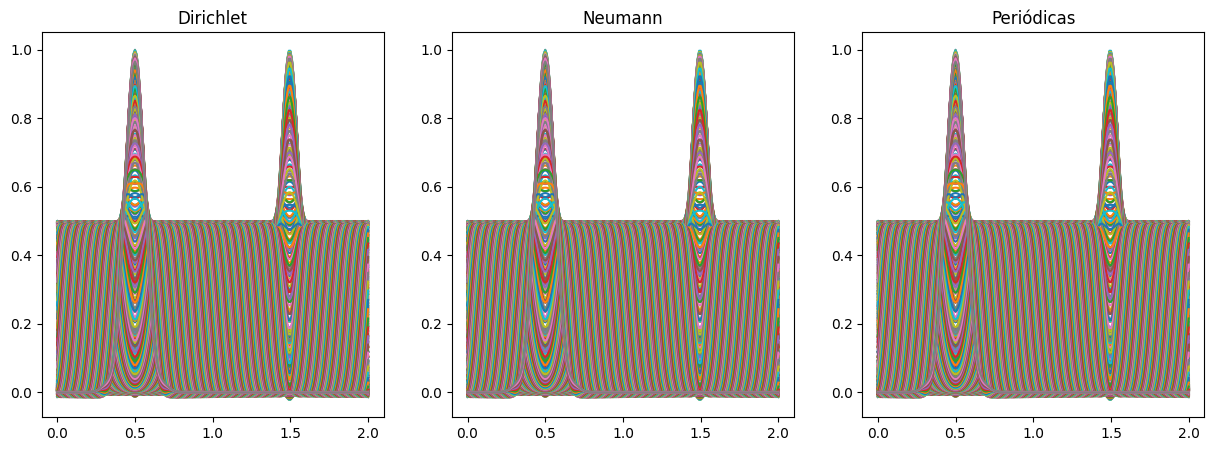

In [4]:
L = 2
c = 1
dx = 0.01
T = 8
dt = dx / c * 0.5
C = (c*dt/dx)**2
N = int(L / dx) + 1
Nt = nt = int(T / dt)
if C > 1:
    raise ValueError("El coeficiente de Courant C es > 1")
print(f"C es igual {C}")

x = np.linspace(0, 2, N)
func = np.zeros((Nt, N))

#Aplicar condiciones iniciales
func[0, :] = np.exp(-125 * (x - (1/2))**2)
func[1,:] = func[0,:]

#Definir condiciones de frontera
def dich(f, n):
    f[n+1, 0] = 0
    f[n+1, -1] = 0
    return f

def neu(f, n):
    f[n+1, 0] = f[n+1, 1]
    f[n+1, -1] = f[n+1, -2]
    return f

def per(f, n):
    f[n+1, 0] = f[n+1, -2]
    f[n+1, -1] = f[n+1, 1]
    return f

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(1, Nt-1):
    for j in range(1, N-1):
        func[i + 1, j] = (2 * func[i, j] - func[i - 1, j] + (c * dt / dx)**2 * ( func[i, j + 1] - 2 * func[i, j] + func[i, j - 1]))

    r_dich = dich(func, i)
    ax1.plot(x, r_dich[i,:])
    
    r_neu = neu(func, i)
    ax2.plot(x, r_neu[i,:])

    r_per = per(func, i)
    ax3.plot(x, r_per[i,:])

ax1.set_title("Dirichlet")
ax2.set_title("Neumann")
ax3.set_title("Periódicas")
plt.show()

C es igual 0.25


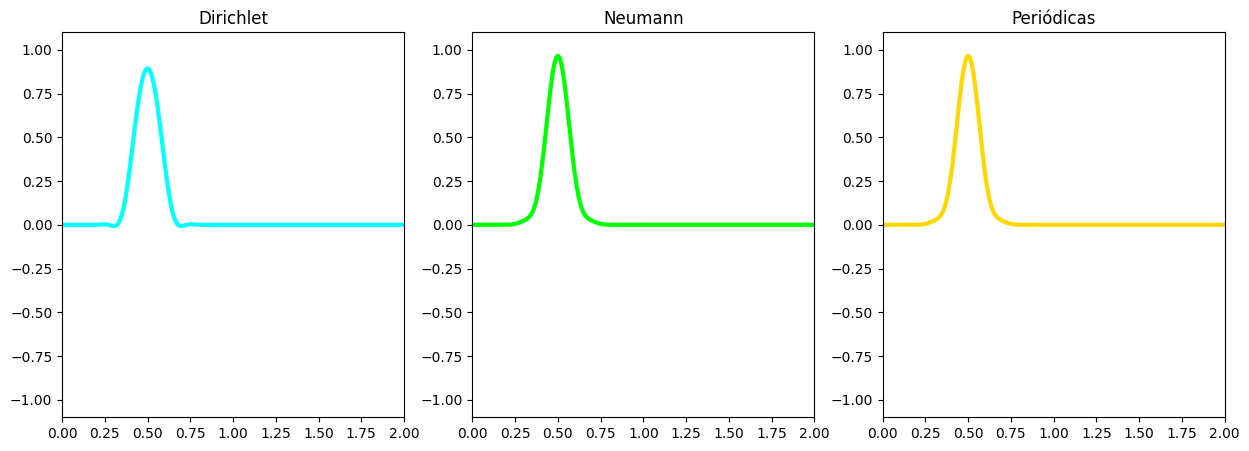

In [5]:
#Extra Punto 2
L = 2
c = 1
dx = 0.01
T = 8
dt = dx / c * 0.5
C = (c*dt/dx)**2
N = int(L / dx) + 1
Nt = nt = int(T / dt)
if C > 1:
    raise ValueError("El coeficiente de Courant C es > 1")
print(f"C es igual {C}")

x = np.linspace(0, 2, N)

func_dich = np.zeros((Nt, N))
func_neu = np.zeros((Nt, N))
func_per = np.zeros((Nt, N))

func_dich[0, :] = np.exp(-125 * (x - 0.5) ** 2)
func_dich[1, :] = func_dich[0, :]

func_neu[0, :] = np.exp(-125 * (x - 0.5) ** 2)
func_neu[1, :] = func_neu[0, :]

func_per[0, :] = np.exp(-125 * (x - 0.5) ** 2)
func_per[1, :] = func_per[0, :]

def dich(f, n):
    f[n+1, 0] = 0
    f[n+1, -1] = 0
    return f

def neu(f, n):
    f[n+1, 0] = f[n+1, 1]
    f[n+1, -1] = f[n+1, -2]
    return f

def per(f, n):
    f[n+1, 0] = f[n+1, -2]
    f[n+1, -1] = f[n+1, 1]
    return f

metadata = dict(title="Muestra Solucíon Animada", artist="Yo")
writer = FFMpegFileWriter(fps=60, metadata=metadata)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for ax in [ax1, ax2, ax3]:
    ax.set_xlim((0, L))
    ax.set_ylim((-1.1, 1.1))
ax1.set_title("Dirichlet")
ax2.set_title("Neumann")
ax3.set_title("Periódicas")

line1, = ax1.plot([], [], lw=3, color="cyan")
line2, = ax2.plot([], [], lw=3, color="lime")
line3, = ax3.plot([], [], lw=3, color="gold")

with writer.saving(fig, "solucion_onda.mp4", 200):
    for i in range(1, Nt - 1):
        for j in range(1, N - 1):
            func_dich[i + 1, j] = (2 * func_dich[i, j] - func_dich[i - 1, j] + (c * dt / dx)**2 * ( func_dich[i, j + 1] - 2 * func_dich[i, j] + func_dich[i, j - 1]))
            func_neu[i + 1, j] = (2 * func_neu[i, j] - func_neu[i - 1, j] + (c * dt / dx)**2 * ( func_neu[i, j + 1] - 2 * func_neu[i, j] + func_neu[i, j - 1]))
            func_per[i + 1, j] = (2 * func_per[i, j] - func_per[i - 1, j] + (c * dt / dx)**2 * ( func_per[i, j + 1] - 2 * func_per[i, j] + func_per[i, j - 1]))

        r_dich = dich(func_dich, i)
        line1.set_data(x, r_dich[i, :])

        r_neu = neu(func_neu, i)
        line2.set_data(x, r_neu[i, :])

        r_per = per(func_per, i)
        line3.set_data(x, r_per[i, :])

        writer.grab_frame()

plt.show()


**AVISO**
Debido a problemas de compatibilidad, La animación se subio al repositorio como un archivo separado. Por favor dirigirse al archivo "solucion_onda.mp4" para ver la animación correspondiente a este punto.

Punto 3

C:\Users\PEPE\AppData\Local\Temp\ipykernel_31492\32532627.py:39: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  masa[j + 1] = np.trapz(u[j + 1, :], x)  # Integral de u
C:\Users\PEPE\AppData\Local\Temp\ipykernel_31492\32532627.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  momento[j + 1] = np.trapz(u[j + 1, :]**2, x)  # Integral de u^2
C:\Users\PEPE\AppData\Local\Temp\ipykernel_31492\32532627.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  energia[j + 1] = np.trapz((1/3 * u[j + 1, :]**3) - (alpha * np.gradient(u[j + 1, :], h))**2, x)


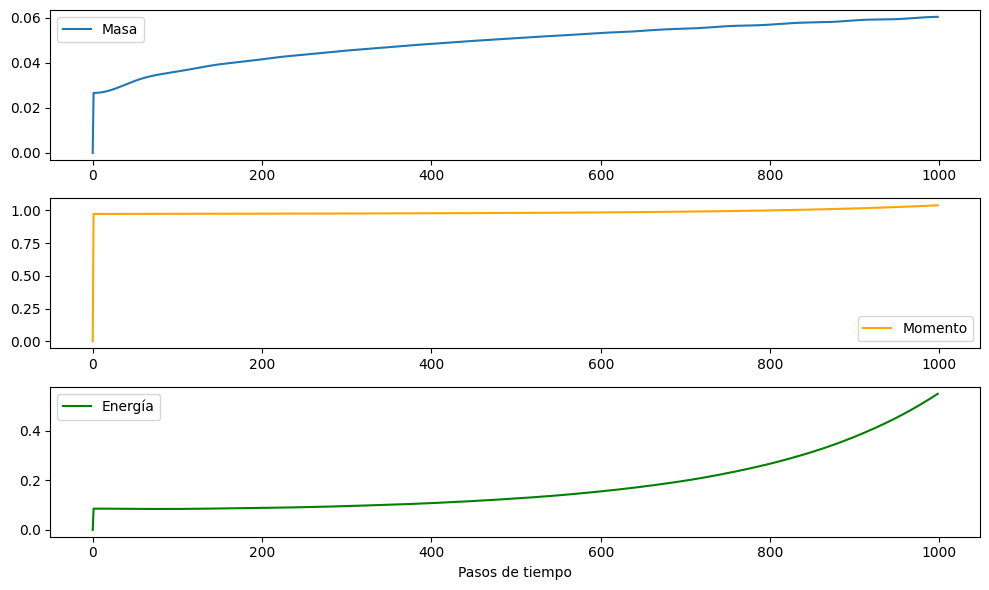

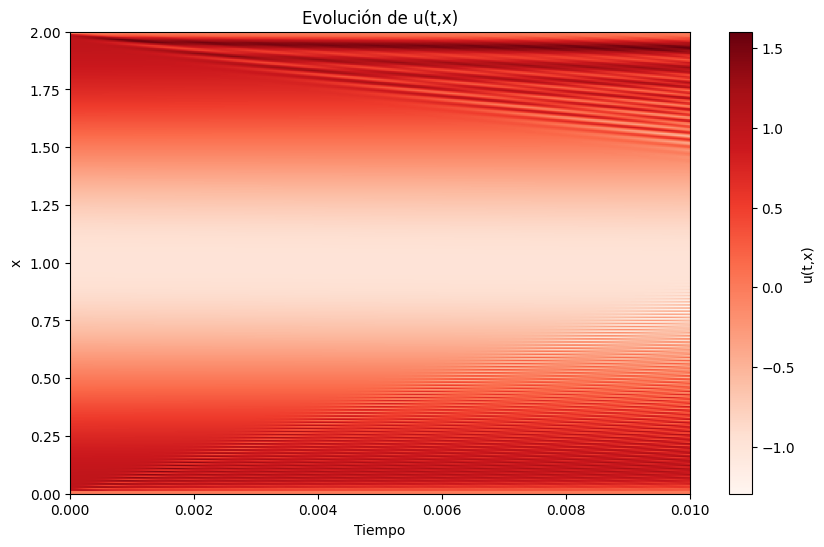

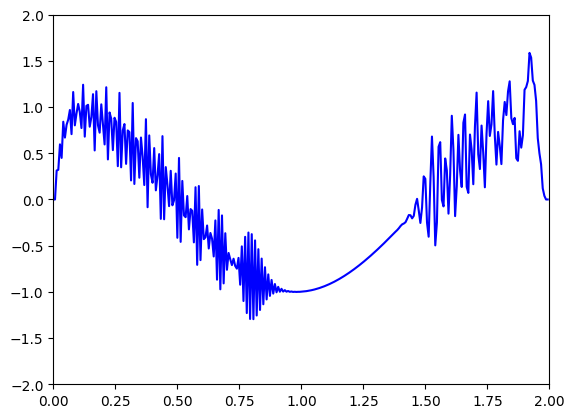

In [6]:
# Parámetros
N = 300  # Número de puntos espaciales
L = 2  # Longitud del dominio
h = L / N  # Tamaño del paso espacial (∆x)
k = 1e-5  # Tamaño del paso temporal (∆t)
alpha = 0.022  # Parámetro alpha

T = 0.01  # Tiempo total de simulación
t_steps = int(T / k)  # Número de pasos temporales

# Inicializar variables
x = np.linspace(0, L, N, endpoint=False)
u = np.zeros((t_steps, N))  # Solución u en función de t y x
masa = np.zeros(t_steps)  # Array para almacenar la masa
momento = np.zeros(t_steps)  # Array para almacenar el momento
energia = np.zeros(t_steps)  # Array para almacenar la energía
# Condiciones iniciales: u(0,x) = cos(pi*x) para t=0

u[0, :] = np.cos(np.pi * x)

# Iterar en el tiempo
for j in range(0, t_steps - 1):
    for i in range(2, N - 2):
        # Primer término
        term1 = (u[j, i + 1] + u[j, i] + u[j, i - 1]) * (u[j, i + 1] - u[j, i - 1])
        term1 *= -1/3 * (k / h)

        # Segundo término
        term2 = (u[j, i + 2] - 2 * u[j, i + 1] + 2 * u[j, i - 1] - u[j, i - 2])
        term2 *= -(alpha ** 2 * k / h ** 3)

        # Suma de los términos
        u[j + 1, i] = u[j, i] + term1 + term2

    # Aplicar condiciones periódicas
    u[j + 1, -1] = u[j + 1, 0]  # Asegurar que u(0) = u(L)

    # Calcular cantidades conservadas
    masa[j + 1] = np.trapz(u[j + 1, :], x)  # Integral de u
    momento[j + 1] = np.trapz(u[j + 1, :]**2, x)  # Integral de u^2
    energia[j + 1] = np.trapz((1/3 * u[j + 1, :]**3) - (alpha * np.gradient(u[j + 1, :], h))**2, x)

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(abs(masa), label='Masa')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(abs(momento), label='Momento', color='orange')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(abs(energia), label='Energía', color='green')
plt.legend()
plt.xlabel('Pasos de tiempo')
plt.tight_layout()
plt.show()

# Configuración de la visualización usando imshow
plt.figure(figsize=(10, 6))
plt.imshow(u.T, aspect='auto', extent=[0, T, 0, L], origin='lower', cmap='Reds')
plt.colorbar(label='u(t,x)')  # Etiqueta de la barra de colores
plt.xlabel('Tiempo')
plt.ylabel('x')
plt.title('Evolución de u(t,x)')
plt.show()

# Configuración de la animación
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(-2, 2)
line, = ax.plot(x, u[0, :], color='blue')

def animate(j):
    line.set_ydata(u[j, :])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=t_steps, interval=50)

# Guardar como video
ani.save('evolucion_u_xt.mp4', writer='ffmpeg', fps=30)
plt.show()

**AVISO**
Debido a problemas de compatibilidad, La animación se subio al repositorio como un archivo separado. Por favor dirigirse al archivo "evolucion_u_xt.mp4" para ver la animación correspondiente a este punto.

Punto 4

In [4]:
# Parámetros
Lx = 2.0  # Longitud del dominio en x (m)
Ly = 1.0  # Longitud del dominio en y (m)
nx, ny = 200, 100  # Número de puntos en x e y
dx = Lx / (nx - 1)  # Espaciado en x
dy = Ly / (ny - 1)  # Espaciado en y
c = 0.5  # Velocidad de la onda (m/s)
dt = 0.01  # Paso de tiempo (s)
nt = 500  # Número de pasos de tiempo

# Inicialización de la malla
u = np.zeros((ny, nx))  # Desplazamiento
u_new = np.zeros((ny, nx))  # Desplazamiento en el siguiente paso
u_old = np.zeros((ny, nx))  # Desplazamiento en el paso anterior

# Condiciones iniciales
for i in range(nx):
    for j in range(ny):
        x = i * dx
        y = j * dy
        u[j, i] = 2 * np.exp(-150 * ((x - 0.4)**2 + (y - 0.5)**2))

# Condiciones de frontera (fijas)
def apply_boundary_conditions(u):
    # Fronteras en x = 0 y x = 2
    u[:, 0] = 0  # Pared en x=0
    u[:, -1] = 0  # Pared en x=2

    # Fronteras en y = 0 y y = 1
    u[0, :] = 0  # Pared en y=0
    u[-1, :] = 0  # Pared en y=1

    # Rendija: permitir que la onda pase a través de la rendija
    for i in range(nx):
        x = i * dx
        for j in range(ny):
            y = j * dy
            if (1 <= x <= 1.2) and not (0.5 - 0.08 <= y <= 0.5 + 0.08):
                u[j, i] = 0  # Condición de rendija

# Simulación de la ecuación de onda
fig, ax = plt.subplots(figsize=(8, 4))
im = ax.imshow(u, cmap='viridis', vmin=-1, vmax=1, extent=[0, Lx, 0, Ly])
ax.set_title('Simulación de la Ecuación de Onda en 2D')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.colorbar(im)

def update(frame):
    global u, u_old, u_new
    apply_boundary_conditions(u)

    # Actualización del estado
    u_new[1:-1, 1:-1] = (2 * u[1:-1, 1:-1] - u_old[1:-1, 1:-1] +
                        (c * dt / dx)**2 * (u[1:-1, :-2] - 2 * u[1:-1, 1:-1] + u[1:-1, 2:] +
                                            u[:-2, 1:-1] - 2 * u[1:-1, 1:-1] + u[2:, 1:-1]))

    # Desplazamiento hacia atrás
    u_old = u.copy()
    u = u_new.copy()

    # Actualizar la imagen
    im.set_array(u)
    return im,

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=nt, interval=dt * 1000, blit=True)

# Guardar el video
ani.save('simulacion_ecuacion_onda.mp4', writer='ffmpeg', fps=30)
plt.close(fig)

**AVISO**
Debido a problemas de compatibilidad, La animación se subio al repositorio como un archivo separado. Por favor dirigirse al archivo "simulacion_ecuacion_onda.mp4" para ver la animación correspondiente a este punto.

In [5]:
# Parámetros
Lx = 2.0  # Longitud del dominio en x (m)
Ly = 1.0  # Longitud del dominio en y (m)
nx, ny = 200, 100  # Número de puntos en x e y
dx = Lx / (nx - 1)  # Espaciado en x
dy = Ly / (ny - 1)  # Espaciado en y
c = 0.5  # Velocidad de la onda (m/s)
dt = 0.01  # Paso de tiempo (s)
nt = 500  # Número de pasos de tiempo

# Inicialización de la malla
u = np.zeros((ny, nx))  # Desplazamiento
u_new = np.zeros((ny, nx))  # Desplazamiento en el siguiente paso
u_old = np.zeros((ny, nx))  # Desplazamiento en el paso anterior

# Condiciones iniciales
for i in range(nx):
    for j in range(ny):
        x = i * dx
        y = j * dy
        u[j, i] = 2 * np.exp(-150 * ((x - 0.4)**2 + (y - 0.5)**2))

# Condiciones de frontera de Neumann
def apply_neumann_boundary_conditions(u):
    # Condiciones de Neumann en las partes verticales de la pared
    u[:, 0] = u[:, 1]  # Derivada en x en x = 0
    u[:, -1] = u[:, -2]  # Derivada en x en x = Lx

    # Condiciones de Neumann en las partes horizontales de la pared
    u[0, :] = u[1, :]  # Derivada en y en y = 0
    u[-1, :] = u[-2, :]  # Derivada en y en y = Ly

    # Pared con rendija (condiciones de Dirichlet con excepción de la rendija)
    for i in range(nx):
        x = i * dx
        for j in range(ny):
            y = j * dy
            if (1 <= x <= 1.2) and not (0.5 - 0.08 <= y <= 0.5 + 0.08):
                u[j, i] = 0  # Pared en x entre 1 y 1.2, exceptuando la rendija

# Simulación de la ecuación de onda
fig, ax = plt.subplots(figsize=(8, 4))
im = ax.imshow(u, cmap='viridis', vmin=-1, vmax=1, extent=[0, Lx, 0, Ly])
ax.set_title('Simulación de la Ecuación de Onda en 2D con Condiciones de Neumann')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.colorbar(im)

def update(frame):
    global u, u_old, u_new
    apply_neumann_boundary_conditions(u)

    # Actualización del estado
    u_new[1:-1, 1:-1] = (2 * u[1:-1, 1:-1] - u_old[1:-1, 1:-1] +
                        (c * dt / dx)**2 * (u[1:-1, :-2] - 2 * u[1:-1, 1:-1] + u[1:-1, 2:] +
                                            u[:-2, 1:-1] - 2 * u[1:-1, 1:-1] + u[2:, 1:-1]))

    # Desplazamiento hacia atrás
    u_old = u.copy()
    u = u_new.copy()

    # Actualizar la imagen
    im.set_array(u)
    return im,

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=nt, interval=dt * 1000, blit=True)

# Guardar el video
ani.save('simulacion_onda_neumann.mp4', writer='ffmpeg', fps=30)
plt.close(fig)


**AVISO**
Debido a problemas de compatibilidad, La animación se subio al repositorio como un archivo separado. Por favor dirigirse al archivo "simulacion_onda_neumann.mp4" para ver la animación correspondiente a este punto.